## Actividad 6

Se detalla a continuacion el desarrollo de la actividad 6.

**Pregunta 1**
Resolver un problema de clasificación binaria utilizando una regresión logística. En este caso por la premura se eligió este dataset de Kaggle el cual contiene información de varios pacientes y sus resultados de muerte en el hospital.

 Elabora un programa en Python donde, a partir del análisis previo del comportamiento de los datos, puedas elaborar un modelo capaz de predecir el resultado adecuado para nuevas condiciones que se pudieran presentar.

In [108]:
# Importar las librerías necesarias
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [109]:
#importando el csv de datos desde github
url = 'https://raw.githubusercontent.com/janus78/MasterIA-Notebooks_Tetra3/master/PatientSurvivalDataset.csv'
df = pd.read_csv(url)

In [110]:
#mostrando los primeros 10 registros del dataframe
df.head(10)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,weight,glucose,heart_rate,d1_temp_max,d1_temp_min,diabetes_mellitus
0,0,68,22.73,0,Caucasian,M,180.3,73.9,168.0,118.0,39.9,37.2,1.0
1,0,77,27.42,0,Caucasian,F,160.0,70.2,145.0,120.0,36.3,35.1,1.0
2,0,25,31.95,0,Caucasian,F,172.7,95.3,0.0,102.0,37.0,36.7,0.0
3,0,81,22.64,1,Caucasian,F,165.1,61.7,185.0,114.0,38.0,34.8,0.0
4,0,19,0.00,0,Caucasian,M,188.0,0.0,0.0,60.0,37.2,36.7,0.0
5,0,67,27.56,0,Caucasian,M,190.5,100.0,156.0,113.0,36.8,36.6,1.0
6,0,59,57.45,0,Caucasian,F,165.1,156.6,197.0,133.0,37.2,35.0,1.0
7,0,70,0.00,0,Caucasian,M,165.0,0.0,164.0,120.0,38.5,36.6,0.0
8,1,45,0.00,0,Caucasian,M,170.2,0.0,380.0,82.0,36.9,36.9,0.0
9,0,50,25.71,0,NaN,M,175.3,79.0,134.0,94.0,37.1,36.4,0.0


In [111]:
#Separando las muestras y la columna de muerte en hospital que es la que se quiere predecir
X = df.drop(['hospital_death'], axis=1)
y = df['hospital_death']

In [112]:
#Preprocesando la columna ethnicity y gender para convertir el texto a valores numéricos y eliminando los NaN
from sklearn import preprocessing
numeros = preprocessing.LabelEncoder()
X['ethnicity'] = numeros.fit_transform(X.ethnicity)
X['gender'] = numeros.fit_transform(X.gender)
X = X.fillna(0)

#Mostrando los primeros 10 registros del set de datos
X.head(10)

,age,bmi,elective_surgery,ethnicity,gender,height,weight,glucose,heart_rate,d1_temp_max,d1_temp_min,diabetes_mellitus
0,68,22.73,0,2,1,180.3,73.9,168.0,118.0,39.9,37.2,1.0
1,77,27.42,0,2,0,160.0,70.2,145.0,120.0,36.3,35.1,1.0
2,25,31.95,0,2,0,172.7,95.3,0.0,102.0,37.0,36.7,0.0
3,81,22.64,1,2,0,165.1,61.7,185.0,114.0,38.0,34.8,0.0
4,19,0.00,0,2,1,188.0,0.0,0.0,60.0,37.2,36.7,0.0
5,67,27.56,0,2,1,190.5,100.0,156.0,113.0,36.8,36.6,1.0
6,59,57.45,0,2,0,165.1,156.6,197.0,133.0,37.2,35.0,1.0
7,70,0.00,0,2,1,165.0,0.0,164.0,120.0,38.5,36.6,0.0
8,45,0.00,0,2,1,170.2,0.0,380.0,82.0,36.9,36.9,0.0
9,50,25.71,0,6,1,175.3,79.0,134.0,94.0,37.1,36.4,0.0


In [113]:
#Mostrando los primeros 10 registros de la columna de muerte
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: hospital_death, dtype: int64

In [114]:
# Usando train test split desde sklearn para crear el set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [115]:
#Creando el modelo de regresión logística, en este caso se recibía un error de que se terminaban las iteraciones por default, se habilita el parámetro max_iter=888 para que se puedan realizar más iteraciones
logreg = LogisticRegression(max_iter=888)

In [116]:
#Entrenando el modelo y mostrando los coeficientes de los parámetros
logreg.fit(X_train, y_train)
print(logreg.coef_)

[[ 0.01248391 -0.00276551 -1.29037084  0.00731113  0.0454619  -0.00305605
  -0.00231729  0.00138336  0.00850509  0.4844279  -0.51904171 -0.28705677]]


**Pregunta 2**
En este caso se procede a elegir la métrica de evaluación de la regresión logística para el modelo de clasificación. Se toma como ejemplos la vista en clade de matriz de confusión, se agrega también la precisión del modelo y la exactitud del mismo, que fueron algunas de las que se investigó en el proceso.

In [117]:
#Realizando la predicción de los datos de prueba
y_pred = logreg.predict(X_test)

In [118]:
#Validando el modelo con la función de evaluación de precisión
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9184975194897236


In [125]:
#Validando el modelo con la función de exactitud
from sklearn.metrics import precision_score
print("Precisión positiva: ",precision_score(y_test, y_pred, pos_label=1))
print("Precisión negativa: ",precision_score(y_test, y_pred, pos_label=0))

Precisión positiva:  0.38372093023255816
Precisión negativa:  0.9210165963739936


In [129]:
#Validando el modelo con la función de matriz de confusión
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[16815    53]
 [ 1442    33]]


Text(0.5, 257.44, 'Valor Predecido')

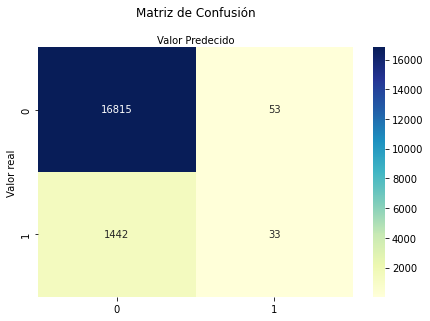

In [130]:
#Imprimiento la matriz de confusión en gráfico
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu"
,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')
#Text(0.5,257.44,'Predicted label')

En este caso podemos notar que se han predecido de una forma acertada los datos que coresponden a los pacioentes que no murieron en el hospital, pero los datos que se predicen como fallecimientos se notan no tan precisos.

Se encontró tambien esta función que calcula en una sola vez varias de las métricas de evaluación de la regresión logística que son : Accuracy, Precision, Recall y F1 Score, la función es la siguiente:
sklearn.metrics.classification_report(y_test, y_pred)

In [131]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16868
           1       0.38      0.02      0.04      1475

    accuracy                           0.92     18343
   macro avg       0.65      0.51      0.50     18343
weighted avg       0.88      0.92      0.88     18343



**Pregunta 3**
Elabora un nuevo modelo en Python que solucione la problemática con las nuevas condiciones, pero en esta ocasión utiliza el modelo de árbol de decisión que mejor se adecúe a estas.

Se presenta el desarrollo de esta pregunta a continuación.

In [151]:
# Importar las librerías necesarias
from sklearn.tree import DecisionTreeClassifier

In [184]:
# Creando el modelo de árbol de decisión
arbol_decision = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=20)

In [185]:
# Entrenando el modelo
modelo = arbol_decision.fit(X_train, y_train)

In [186]:
# Realizando la predicción de los datos de prueba
y_pred = modelo.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [187]:
#Mostrando la probabilidad obtenida para la muestra de prueba
print(modelo.predict_proba(X_test))

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.5 0.5]
 [1.  0. ]
 [0.  1. ]]


In [189]:
#Realizando la gráfica del arbol de decisión
import pydotplus
from IPython.display import Image
from sklearn import tree

X_names=["age", "bmi", "elective_surgery", "ethnicity", "gender", "height", "weight", "glucose", "heart_rate", "temp_max", "temp_min", "diabetes"]
y_class = ["No_muerte", "Muerte"]
# Create DOT data
dot_data = tree.export_graphviz(arbol_decision,out_file=None,feature_names=X_names,class_names=y_class)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [188]:
#Obteniendo las métricas de evaluación para este modelo
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     16868
           1       0.24      0.22      0.23      1475

    accuracy                           0.88     18343
   macro avg       0.59      0.58      0.58     18343
weighted avg       0.88      0.88      0.88     18343



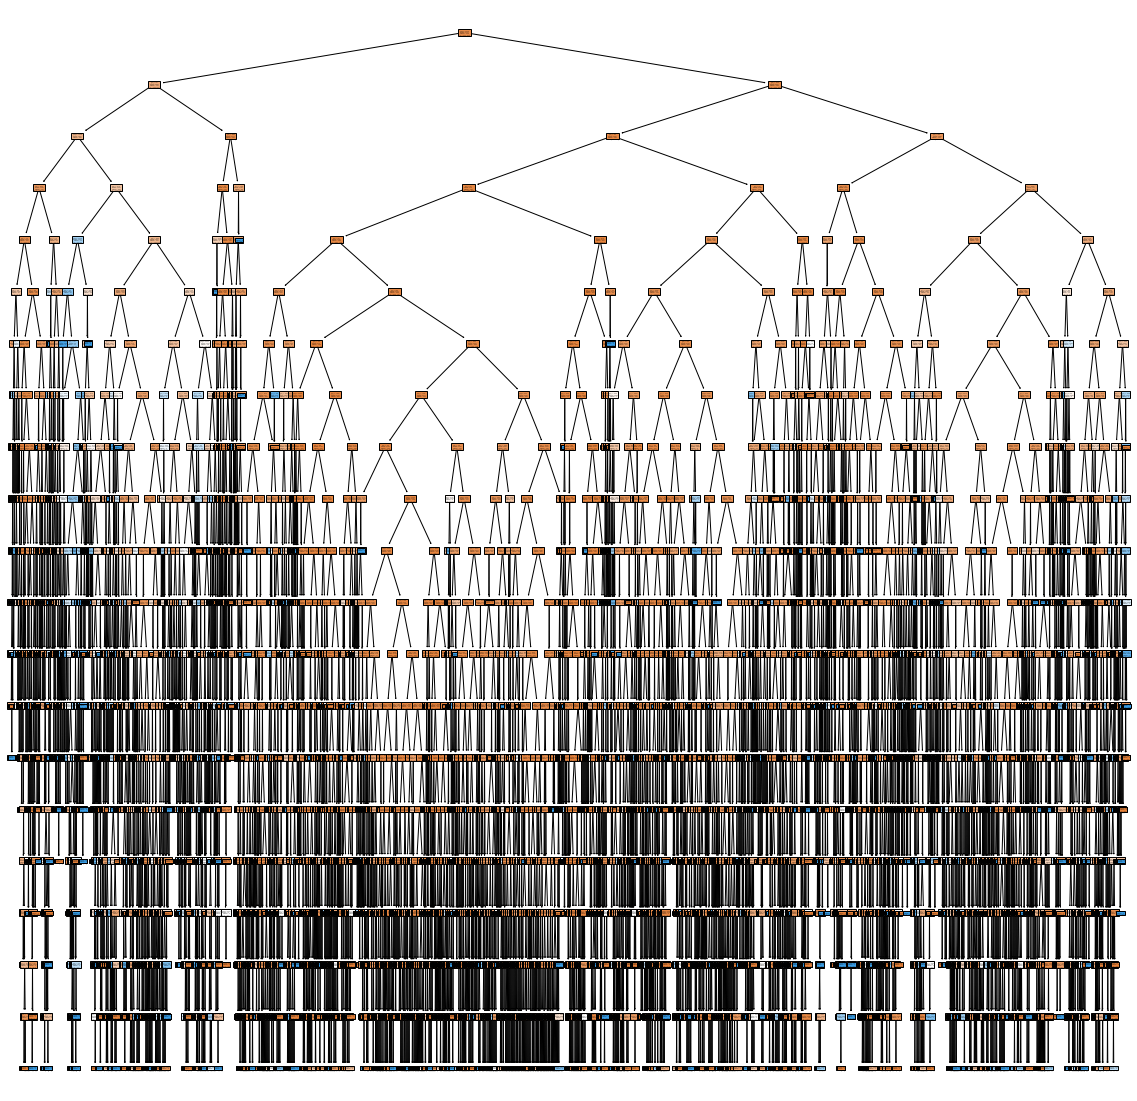

In [192]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(arbol_decision, filled=True)
plt.savefig("arbol_decision.eps", format="eps", dpi=300, bbox_inches="tight")